<a href="https://colab.research.google.com/github/mnhakimie-mys/machine-learning-projects/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load and Explore Data
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/CarPrice_Assignment.csv'
df = pd.read_csv(file_path)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Check Data
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [ ]:
# Clean and Preprocess the Data
df['brand'] = df['CarName'].apply(lambda x: x.split()[0].lower()) # Extract Brand Name from CarName
df.drop('CarName', axis=1, inplace=True) # Drop carName Column
df.drop(['car_ID'], axis=1, inplace=True) # Drop car_ID Column

In [ ]:
# Encode Categorical Columns
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody',
                    'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
                    'fuelsystem', 'brand']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
# Split the Data
x = df.drop('price', axis=1) # Independent variables
y = df['price'] # The value to predict

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Train Machine Learning Model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
# Make Predictions

y_pred = model.predict(x_test)

In [ ]:
# Evaluate the Model

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

r2 = r2_score(y_test, y_pred)

print("RMSE: ", rmse)
print("R2 Score: ", r2)

RMSE:  1826.658776590685
R2 Score:  0.9577335655200256


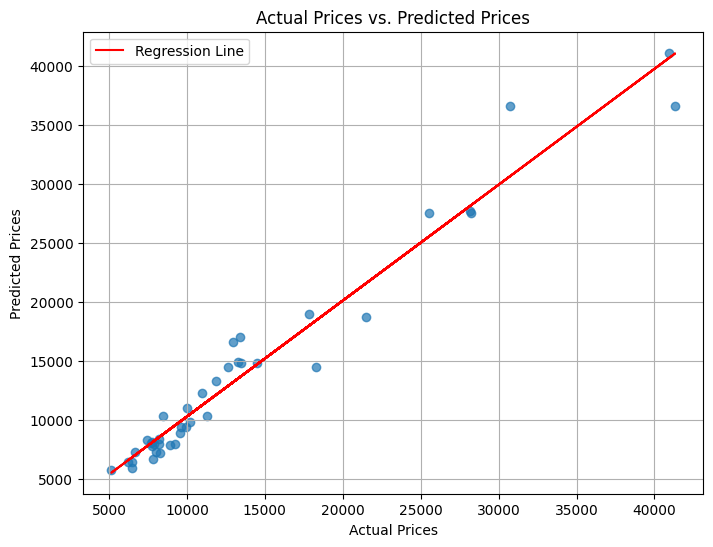

In [ ]:
# Visualize

import matplotlib.pyplot as plt
import numpy as np

# Calculate linear regression
slope, intercept = np.polyfit(y_test, y_pred, 1)
regression_line = slope * y_test + intercept

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot(y_test, regression_line, color='red', label='Regression Line') # Add line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.grid(True)
plt.legend() # Show legend for the line
plt.show()

In [ ]:
# Save the Model

import joblib

joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/car_price_prediction_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/car_price_prediction_model.pkl']